<a href="https://colab.research.google.com/github/swastikbanerjee/ML_Lab/blob/main/2348566_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('/content/insurance.csv')

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Converting Categoical variables into numerical variables

In [ ]:
data.replace({'sex':{'male':0,'female':1},'smoker':{'yes':1,'no':0}},inplace=True)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


One-hot encoding 'region' column

In [ ]:
data=pd.get_dummies(data,'region')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


Train-Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('charges', axis=1)
Y = data['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

Evaluating Linear Regression model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Make predictions on the test data
Y_pred = lin_reg.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)
# MAE is a measure of the average absolute errors between the actual values (Y_test) and the predicted values (Y_pred).
# It quantifies the average magnitude of errors in the predictions.
# A lower MAE indicates better model performance, with smaller errors.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)
# MSE is a measure of the average squared errors between the actual values (Y_test) and the predicted values (Y_pred).
# It gives more weight to large errors compared to MAE and is sensitive to outliers.
# Like MAE, a lower MSE suggests better model performance, with smaller errors.

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
# RMSE is the square root of MSE, which provides a measure of the average magnitude of errors in the original scale of the data.
# It is easier to interpret since it has the same unit as the target variable.
# As with MAE and MSE, a lower RMSE signifies better model performance.

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared (R2) score:", r2)
# R2 is a measure of the proportion of the variance in the dependent variable (Y) that is predictable from the independent variables (X) in the model.
# It ranges from 0 to 1, where 0 indicates that the model does not explain any variance, and 1 indicates that the model explains all the variance.
# A higher R2 score suggests a better fit of the model to the data.

# Calculate Adjusted R-squared score
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared score:", adjusted_r2)
# Adjusted R2 is a modified version of R2 that adjusts for the number of independent variables in the model.
# It penalizes the inclusion of unnecessary features that don't improve the model's fit.
# Similar to R2, a higher adjusted R2 indicates a better model fit, but it accounts for model complexity.

# Calculate Residual Sum of Squares (RSS)
rss = np.sum((Y_test - Y_pred) ** 2)
print("Residual Sum of Squares (RSS):", rss)
# RSS is the sum of the squared differences between the actual values and the predicted values.
# It represents the unexplained variance in the dependent variable by the model.
# Smaller RSS values indicate better model fit.

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", explained_var_score)
# The Explained Variance Score measures the proportion of variance in the dependent variable (Y) that is explained by the model's predictions.
# It is similar in interpretation to R2 but may have values below 0 in some cases.
# A higher Explained Variance Score indicates a better model's ability to explain variance in the target variable.


Mean Absolute Error (MAE): 3933.272649405236
Mean Squared Error (MSE): 31827950.22952384
Root Mean Squared Error (RMSE): 5641.62655885019
R-squared (R2) score: 0.7999876970680433
Adjusted R-squared score: 0.7930105237099517
Residual Sum of Squares (RSS): 8529890661.512389
Explained Variance Score: 0.8002657348677408


Calculating Absolute Coefficients to evaluate features having the most significant impact on predicting
medical insurance costs

In [ ]:
# Get the coefficients (weights) and corresponding feature names
coefficients = lin_reg.coef_
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by absolute coefficient value in descending order
feature_importance_df['Absolute_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the feature importance
print(feature_importance_df)

            Feature   Coefficient  Absolute_Coefficient
4            smoker  23605.017267          23605.017267
5  region_northeast    483.840068            483.840068
3          children    436.910121            436.910121
7  region_southeast   -429.438766            429.438766
2               bmi    335.962814            335.962814
8  region_southwest   -278.108638            278.108638
0               age    253.700500            253.700500
6  region_northwest    223.707336            223.707336
1               sex     15.463728             15.463728


Features with larger absolute coefficients have a more significant impact on the predictions.

Scatterplot to visualize actual insurance charges vs predicted
insurance charges

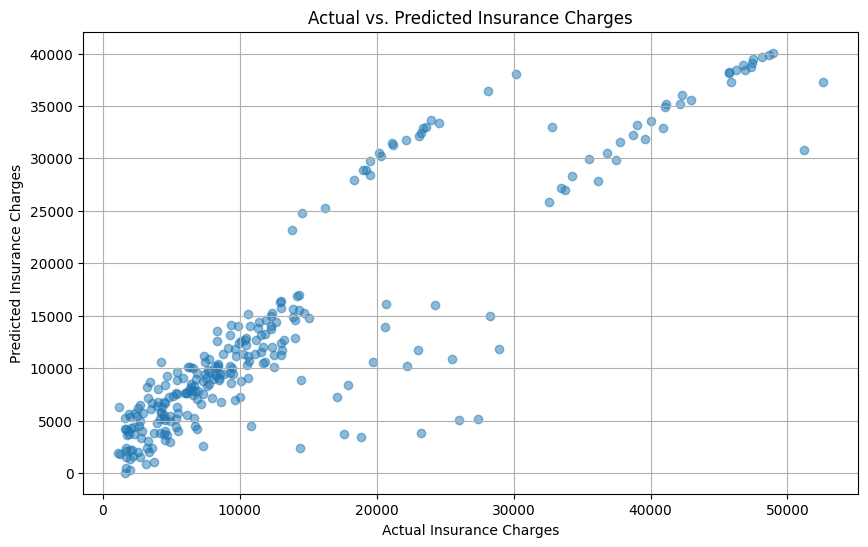

In [ ]:
# Create a scatterplot of actual vs. predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.grid(True)
plt.show()

The "smoker" feature appears to be the most significant contributor to higher medical insurance costs, as indicated by its coefficient in the linear regression model. Smokers tend to have significantly higher insurance costs compared to non-smokers.

Individuals can reduce their insurance costs by quitting smoking or avoiding smoking altogether, as this is a major driver of higher costs.
Maintaining a healthy lifestyle, including managing BMI through diet and exercise, can help lower insurance costs.

Recommendation : "Reduce insurance costs by quitting smoking, staying healthy, and starting insurance planning early."